In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv',nrows=1000000)
df.shape

(1000000, 8)

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


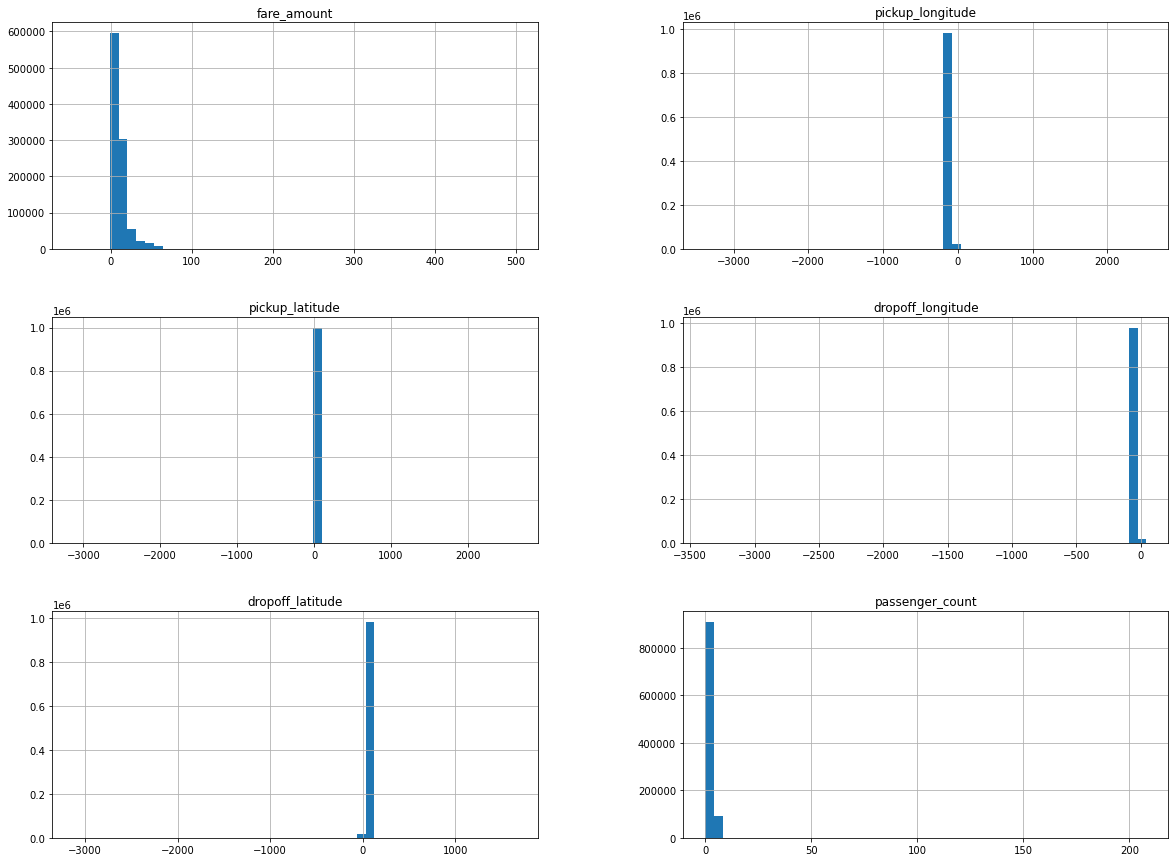

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='pickup_longitude', ylabel='fare_amount'>

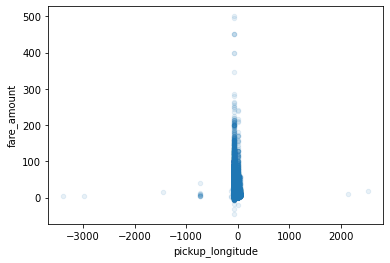

In [5]:
df.plot(kind="scatter",x="pickup_longitude",y="fare_amount",alpha=0.1)

In [6]:
corr=df.corr()
corr["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
passenger_count      0.012801
dropoff_longitude    0.009644
pickup_longitude     0.008740
dropoff_latitude    -0.007629
pickup_latitude     -0.007676
Name: fare_amount, dtype: float64

array([[<AxesSubplot:xlabel='fare_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='pickup_latitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='dropoff_longitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='dropoff_latitude', ylabel='fare_amount'>],
       [<AxesSubplot:xlabel='fare_amount', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='pickup_latitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='dropoff_longitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='dropoff_latitude', ylabel='pickup_longitude'>],
       [<AxesSubplot:xlabel='fare_amount', ylabel='pickup_latitude'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>,
        <AxesSubplot:xlabel='pickup_latitude', ylabel='pickup_latitude'>,
        <AxesSubplot:xlabel='dropoff_longitude', ylabe

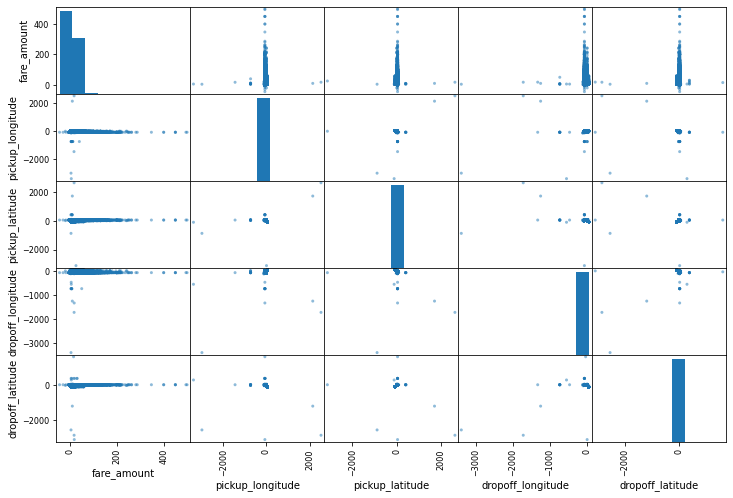

In [7]:
from pandas.plotting import scatter_matrix
att=["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]
scatter_matrix(df[att],figsize=(12,8))

In [8]:
df['pickup_longitude'].unique()

array([-73.844311, -74.016048, -73.982738, ..., -74.023533, -73.872276,
       -73.872919])

In [9]:
df['passenger_count'].unique()

array([  1,   2,   3,   6,   5,   4,   0, 208], dtype=int64)

In [10]:
df['passenger_count'].value_counts()

1      691344
2      148105
5       70595
3       43765
4       21429
6       21196
0        3565
208         1
Name: passenger_count, dtype: int64

In [3]:
df.drop(df.index[(df.passenger_count==0)|(df.passenger_count>5)],axis=0,inplace=True)

In [12]:
df['passenger_count'].value_counts()

1    691344
2    148105
5     70595
3     43765
4     21429
Name: passenger_count, dtype: int64

In [4]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df['fare_amount'].value_counts()

6.50     47420
4.50     40128
8.50     36438
5.30     28832
5.70     28616
         ...  
44.58        1
65.60        1
88.58        1
63.07        1
46.58        1
Name: fare_amount, Length: 2123, dtype: int64

In [16]:
df['fare_amount'].describe()

count    975238.000000
mean         11.337706
std           9.822456
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [6]:
df.drop(df.index[df.fare_amount<=0],axis=0,inplace=True)
df.shape

(975172, 8)

In [7]:
df.drop(['key','pickup_datetime'],axis=1,inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df.drop(df.index[(df.pickup_longitude<-75)|(df.pickup_longitude>-72)|(df.pickup_latitude<40)|(df.pickup_latitude>42)],axis=0,inplace=True)
df.drop(df.index[(df.dropoff_longitude<-75)|(df.dropoff_longitude>-72)|(df.dropoff_latitude<40)|(df.dropoff_latitude>42)],axis=0,inplace=True)
df.shape

(954915, 6)

In [20]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
from geopy import Point
from geopy.distance import distance
df["point1"]=df.apply(lambda row: Point(latitude=row['pickup_latitude'], longitude=row['pickup_longitude']), axis=1)
df["point2"]=df.apply(lambda row: Point(latitude=row['dropoff_latitude'], longitude=row['dropoff_longitude']), axis=1)
df['distance_km'] = df.apply(lambda row: distance(row['point1'], row['point2']).km, axis=1)

In [22]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,point1,point2,distance_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,"40 43m 16.7484s N, 73 50m 39.5196s W","40 42m 44.2008s N, 73 50m 29.796s W",1.029601
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,"40 42m 40.6908s N, 74 0m 57.7728s W","40 46m 55.2144s N, 73 58m 45.3648s W",8.443441
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,"40 45m 40.572s N, 73 58m 57.8568s W","40 45m 2.0232s N, 73 59m 28.4712s W",1.389132
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,"40 43m 59.3148s N, 73 59m 13.668s W","40 45m 29.1312s N, 73 59m 29.6412s W",2.795790
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,"40 46m 4.8288s N, 73 58m 5.142s W","40 47m 1.5432s N, 73 57m 23.958s W",1.998338
...,...,...,...,...,...,...,...,...,...
999995,7.0,-73.976676,40.785630,-73.959196,40.775114,1,"40 47m 8.268s N, 73 58m 36.0336s W","40 46m 30.4104s N, 73 57m 33.1056s W",1.881758
999996,7.3,-73.992103,40.671385,-73.992103,40.671385,2,"40 40m 16.986s N, 73 59m 31.5708s W","40 40m 16.986s N, 73 59m 31.5708s W",0.000000
999997,10.5,-73.978423,40.751135,-73.993397,40.762197,5,"40 45m 4.086s N, 73 58m 42.3228s W","40 45m 43.9092s N, 73 59m 36.2292s W",1.762923
999998,6.9,-73.980317,40.759482,-73.976832,40.743122,1,"40 45m 34.1352s N, 73 58m 49.1412s W","40 44m 35.2392s N, 73 58m 36.5952s W",1.840448


<AxesSubplot:xlabel='distance_km', ylabel='fare_amount'>

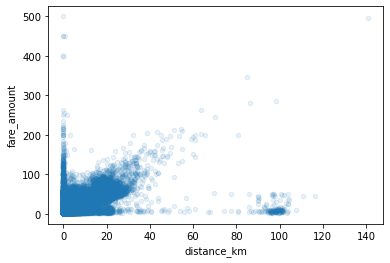

In [23]:
df.plot(kind="scatter",x="distance_km",y="fare_amount",alpha=0.1)

In [26]:
df.sample()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,point1,point2,distance_km
302528,18.5,-73.958763,40.77758,-73.962601,40.758801,1,"40 46m 39.2889s N, 73 57m 31.5472s W","40 45m 31.6818s N, 73 57m 45.3625s W",2.1105


In [27]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
point1               0
point2               0
distance_km          0
dtype: int64

In [28]:
corr=df.corr()
corr["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
distance_km          0.810651
pickup_longitude     0.371415
dropoff_longitude    0.286309
passenger_count      0.006933
dropoff_latitude    -0.150967
pickup_latitude     -0.183985
Name: fare_amount, dtype: float64

In [81]:
df1=df.drop(["point1","point2"],axis=1)

In [82]:
df1.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km'],
      dtype='object')

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipe=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])
df2=pipe.fit_transform(df1)

In [84]:
df3=pd.DataFrame(df2,columns=df1.columns)

In [85]:
df3

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-0.699907,3.337875,-0.988660,3.451083,-1.177399,-0.517838,-0.607320
1,0.572387,-1.043757,-1.321552,-0.130785,0.920727,-0.517838,1.349916
2,-0.576782,-0.193899,0.339155,-0.442349,-0.025395,0.349038,-0.512405
3,-0.371573,-0.305954,-0.595676,-0.450805,0.201191,-0.517838,-0.141051
4,-0.617824,0.179697,0.563100,0.457607,0.973627,-0.517838,-0.351576
...,...,...,...,...,...,...,...
954910,-0.443396,-0.039235,1.148786,0.391490,0.713400,-0.517838,-0.382353
954911,-0.412615,-0.432834,-2.648270,-0.464752,-2.407910,0.349038,-0.879133
954912,-0.084281,-0.083807,0.002308,-0.498422,0.324714,2.949668,-0.413725
954913,-0.453657,-0.132130,0.279729,-0.067400,-0.249272,-0.517838,-0.393259


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df3.drop(["fare_amount"],axis=1),df3["fare_amount"],test_size=0.2)

In [87]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.6642598386519847

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
score=cross_val_score(LinearRegression(),df3.drop(["fare_amount"],axis=1),df3["fare_amount"], cv=cv)

In [90]:
from sklearn.metrics import mean_squared_error as MSE
y_pred=model.predict(x_test)
rmse=np.sqrt(MSE(y_test,y_pred))
rmse

0.5726791918740131